# About Dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

About this file
Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear
Models, Proceedings of the 9th International Biometrics
Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
Graphical Models for Assessing Logistic Regression Models (with
discussion), Journal of the American Statistical Association 79:
61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)



Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year



In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('haberman.csv')

In [5]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
# checking the shape
df.shape

(305, 4)

In [8]:
# want to label column as the column is given in numeric value
label = ['Age','op_year','axilary node','survival']
df.columns =  label

In [9]:
df

,Age,op_year,axilary node,survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [14]:
df['survival'].value_counts()

1    224
2     81
Name: survival, dtype: int64

# observation 1
This is a imbalance dataset where patient live for 5 and more year is 224 and died within 5 year is 81

In [15]:
df.describe()

,Age,op_year,axilary node,survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observation 2 
Age - the standard deviation is high a compare to other feature 10.74 indicate that the spread is high

#  Checking for Bivarent observation

## 2 D scatter plot

In [37]:
import matplotlib.pyplot as plt

%matplotlib inline

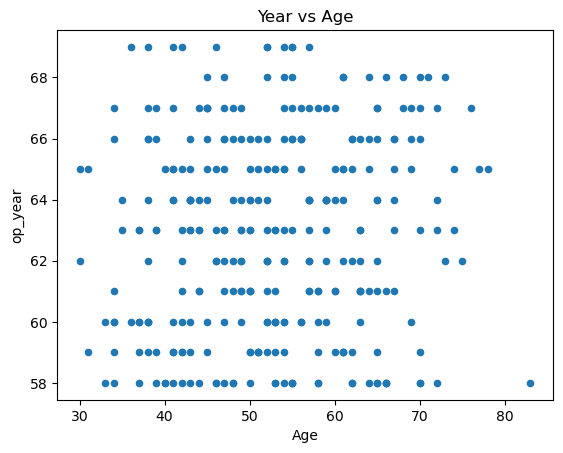

In [42]:
df.plot(kind='scatter', x = 'Age', y = 'op_year', title= 'Year vs Age');

# Observation 3:

Relation between age and year is not clearly visible with this plot.


Checking multocollinearity

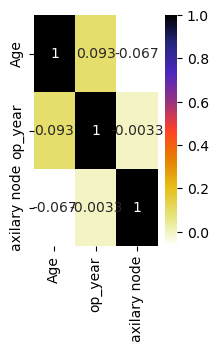

In [49]:
df1 = df[['Age','op_year','axilary node']]
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(2,3))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Observation 4
None of the independent feature is highly correlated cant mmake any judgement

# scatter plot with color coding to make some relevant obseravation

Text(0.5, 1.0, 'Age vs Year')

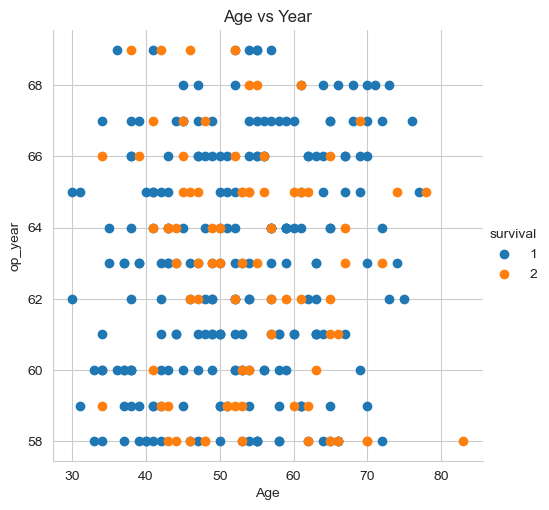

In [57]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival',height =5).map(plt.scatter,"Age","op_year").add_legend();
plt.title("Age vs Year")

# Obsrvation 5
There is no clear seperation between survival 1 and survival 2

C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


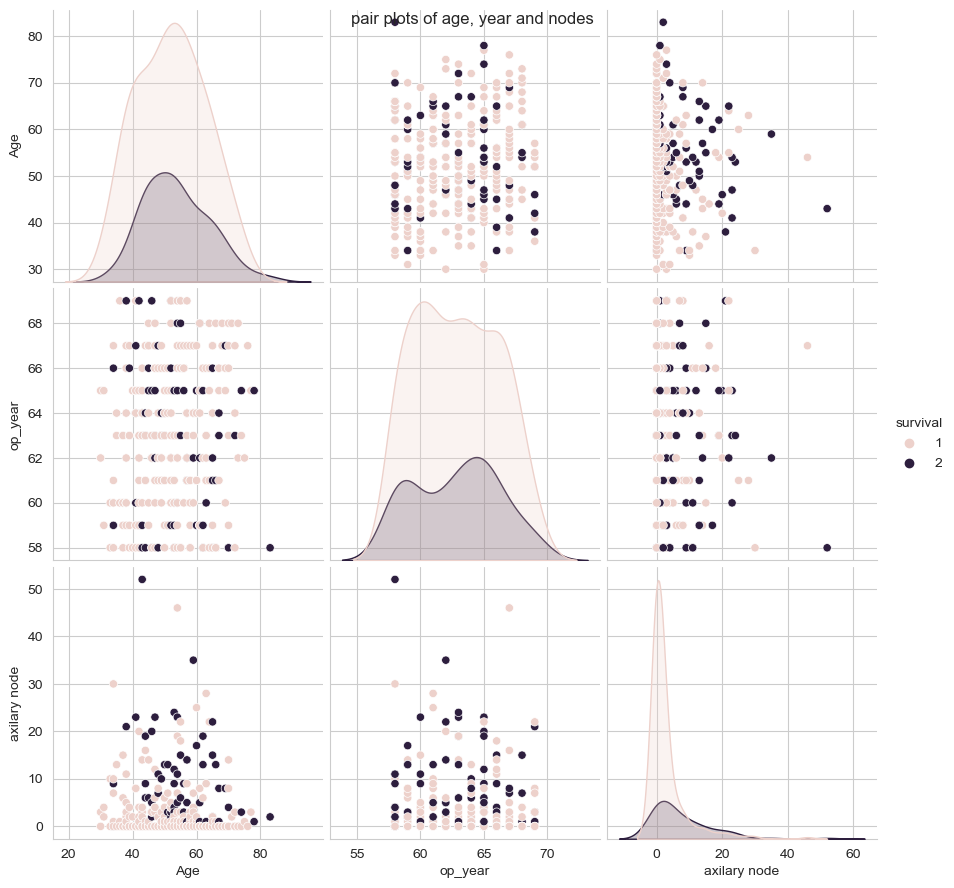

In [61]:
#pair-wise scatter plotting
plt.close();
sns.set_style("whitegrid");

sns.pairplot(df, hue = "survival", vars=['Age','op_year','axilary node'] , size = 3);
plt.suptitle("pair plots of age, year and nodes");

plt.show();


There is no clear seperation between status 1 and status 2

# univariate analysis
Histogram PDF  CDF

In [63]:
import numpy as np

survived = df[df["survival"] == 1];
notsurvived = df[df["survival"] == 2];

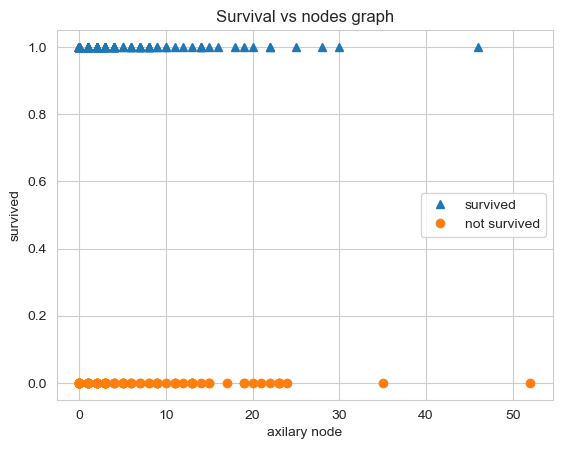

In [77]:
plt.plot( survived["axilary node"],np.ones_like(survived['axilary node']), '^', label = 'survived')
plt.plot(notsurvived["axilary node"], np.zeros_like(notsurvived['axilary node']), 'o', label = 'not survived');
plt.xlabel("axilary node");
plt.ylabel("survived");
plt.legend();
plt.title("Survival vs nodes graph");

# Observation 6:

Most of the points for this dataset are overlapping, hence it is not possible to draw some conclusion for classification based on these variables

C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


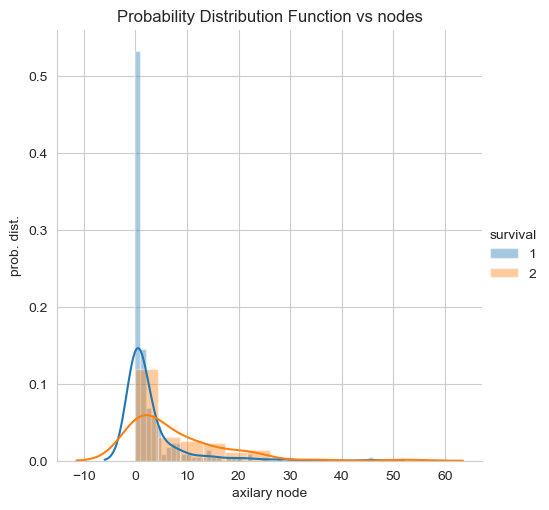

In [80]:
sns.FacetGrid(df, hue = "survival", height = 5)\
    .map(sns.distplot, "axilary node")\
    .add_legend();
plt.ylabel("prob. dist.");
plt.title("Probability Distribution Function vs nodes")
plt.show();

In [ ]:
Observation(s):¶
Most of the points for this dataset are overlapping, hence it is not possible to draw some conclusion for classification based on these variables

C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


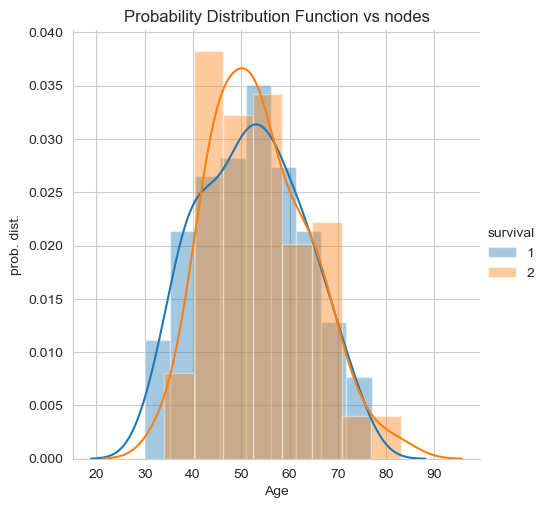

In [82]:
sns.FacetGrid(df, hue = "survival", height = 5)\
    .map(sns.distplot, "Age")\
    .add_legend();
plt.ylabel("prob. dist.");
plt.title("Probability Distribution Function vs nodes")
plt.show();

C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Aniket\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


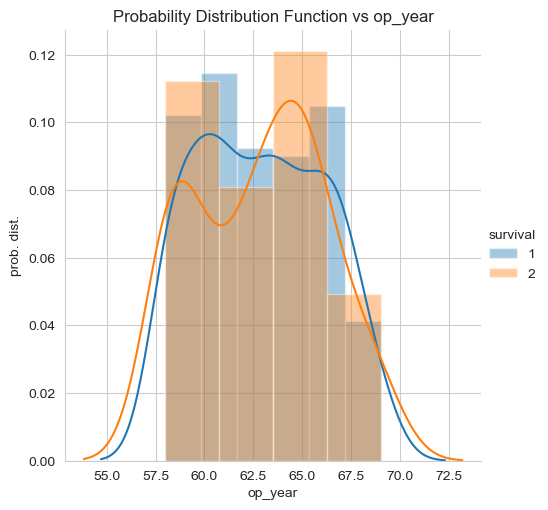

In [86]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival',height=5).map(sns.distplot,'op_year').add_legend()
plt.ylabel("prob. dist.");
plt.title("Probability Distribution Function vs op_year")
plt.show();

In [88]:
print("\nMedians:")
print(np.median(df["Age"]))
print(np.median(df["axilary node"]))
print(np.median(df["op_year"]))


print("\nQuantiles:")
print(np.percentile(df["Age"],np.arange(0, 100, 25)))
print(np.percentile(df["axilary node"],np.arange(0, 100, 25)))
print(np.percentile(df["op_year"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(df["Age"],90))
print(np.percentile(df["axilary node"],90))
print(np.percentile(df["op_year"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df["Age"]))
print(robust.mad(df["axilary node"]))
print(robust.mad(df["op_year"]))


Medians:
52.0
1.0
63.0

Quantiles:
[30. 44. 52. 61.]
[0. 0. 1. 4.]
[58. 60. 63. 66.]

90th Percentiles:
67.0
13.0
67.0

Median Absolute Deviation
11.860817748044816
1.482602218505602
4.447806655516806


# Observation
Median Absolute Deviation for age shows the heterogeneity in age is more than other features
IQR of age (75th percentile - 25th percentile) shows that the 50 percent of age lies in range 44 - 52

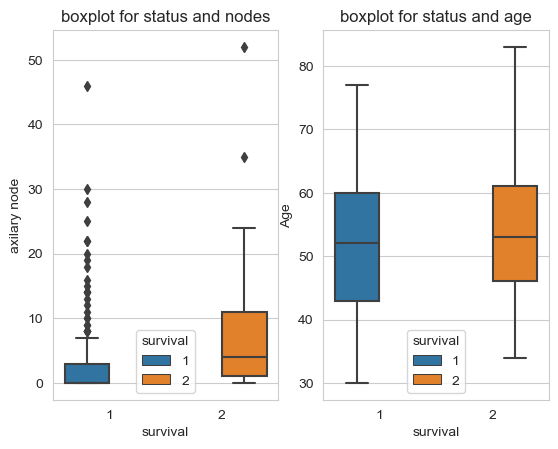

In [93]:
plt.subplot(121)
plt.title("boxplot for status and nodes");
sns.boxplot(x='survival',y='axilary node', data=df, hue = 'survival')

plt.subplot(122)
sns.boxplot(x='survival', y ='Age', data=df, hue= 'survival')
plt.title("boxplot for status and age");
plt.show()

In [98]:
import pandas_profiling

C:\Users\Aniket\AppData\Local\Temp\ipykernel_2076\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [99]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]